# <font color='blue'>Imports </font>

In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, brier_score_loss

Wall time: 3.48 s


In [2]:
path = 'D:\\Python\\Notebooks\\Datascience\\Classification_datascience\\webscrapping\\matches\\rounds\\'
dataset = pd.read_csv('{}combined_csv.csv'.format(path))

In [3]:
dataset = dataset.drop(['bestOF', 'RoundNumber', 'SeriesID', 'MatchID', 'RoundID', 'RoundTime'], axis=1)

In [4]:
dataset = pd.get_dummies(dataset, columns=['MapName'])

In [5]:
dataset.head()

,ATK_wealth,DEF_wealth,ATK_alive,DEF_alive,DEF_has_OP,Def_has_Odin,RegularTime,SpikeTime,FinalWinner,MapName_Ascent,MapName_Bind,MapName_Breeze,MapName_Haven,MapName_Icebox,MapName_Split
0,500.0,0.0,5,5,0,0,0,0,0,0,0,0,1,0,0
1,500.0,0.0,5,4,0,0,21,0,0,0,0,0,1,0,0
2,400.0,0.0,4,4,0,0,22,0,0,0,0,0,1,0,0
3,300.0,0.0,3,4,0,0,24,0,0,0,0,0,1,0,0
4,200.0,0.0,2,4,0,0,26,0,0,0,0,0,1,0,0


In [6]:
X = dataset.drop(['FinalWinner'], axis='columns')
Y = dataset.FinalWinner

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=15)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size=0.9, test_size=0.1, random_state=15)

# <font color='blue'>Model </font>

In [7]:
%%time
LGBM = lightgbm.LGBMClassifier(boosting_type="dart")
LGBM.fit(X_train, Y_train)

Wall time: 1.42 s


LGBMClassifier(boosting_type='dart')

# <font color='blue'>MODEL PRECISION </font>

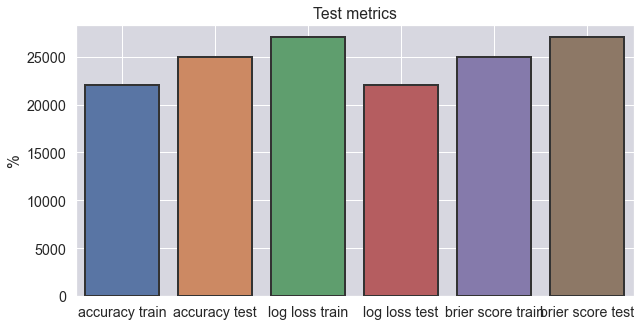

In [16]:
plt.figure(figsize = (10,5))

gmt = ["accuracy train", "accuracy test", "log loss train", "log loss test", "brier score train", "brier score test"]
cars = {'Brand': gmt,
        'Price': [22000,25000,27000,22000,25000,27000]
        }

sns.set_context(rc = {'patch.linewidth': 2.0})
sns.set(font_scale=1.3)
ax = sns.barplot(x='Brand', y='Price', data=cars, linewidth=2.0, edgecolor=".2", zorder=3, palette=sns.color_palette("deep"))

plt.ylabel('%')
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.grid(linewidth=1, color='white', zorder=0)
ax.set_facecolor("#d7d7e0")
plt.title("Test metrics")
plt.show()

# <font color='blue'>CONFUSION MATRIX </font>

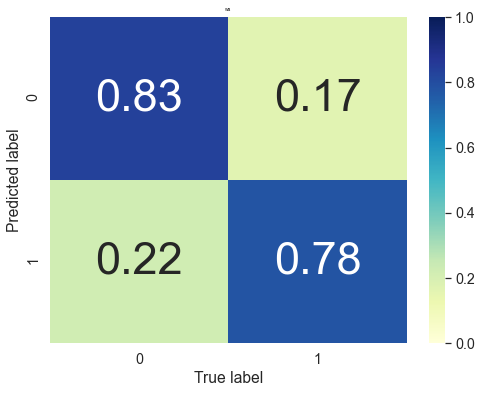

In [21]:
plt.figure(figsize = (8,6))
cm = confusion_matrix(Y_test, LGBM.predict(X_test))
cm = (cm/cm.sum(axis=1).reshape(-1,1))

sns.heatmap(cm, cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title("wa", fontsize = 5)
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

# <font color='blue'>Testing </font>

In [10]:
data = {'ATK_wealth': [3320, 3320, 2740, 2740, 1740, 1740, 1740, 1160, 580, 0],
        'DEF_wealth': [2900, 2320, 2320, 2320, 2320, 1740, 1160, 1160, 1160, 1160],
       'ATK_alive': [5,5,4,4,3,3,3,2,1,0],
       'DEF_alive': [5,4,4,4,4,3,2,2,2,2],
       'Def_has_OP': [0,0,0,0,0,0,0,0,0,0],
       'Def_has_Odin': [0,0,0,0,0,0,0,0,0,0],
       'Spike_1_beep': [0,0,0,0,1,1,1,1,1,0],
       'Spike_2_beep': [0,0,0,0,0,0,0,0,0,1],
       'MapName_Ascent': [0,0,0,0,0,0,0,0,0,0],
       'MapName_Bind': [0,0,0,0,0,0,0,0,0,0],
       'MapName_Breeze': [0,0,0,0,0,0,0,0,0,0],
       'MapName_Haven': [0,0,0,0,0,0,0,0,0,0],
       'MapName_Icebox': [0,0,0,0,0,0,0,0,0,0],
       'MapName_Split': [1,1,1,1,1,1,1,1,1,1]}

In [11]:
%%time
round_test = pd.DataFrame(data)

for i in range(0, 10):
    aux = LGBM.predict_proba(round_test.loc[i,:].to_numpy().reshape(1,-1))[0][0]
    print("{}%".format(round(aux, 3)*100))

53.400000000000006%
36.4%
49.4%
49.4%
70.39999999999999%
50.9%
26.400000000000002%
53.400000000000006%
83.8%
98.6%
Wall time: 11 ms


# <font color='blue'>Query </font>

In [12]:
df = pd.read_csv('{}combined_csv.csv'.format(path))

In [13]:
df.query('RoundID == 403022')

,RoundID,RoundNumber,RoundTime,ATK_wealth,DEF_wealth,ATK_alive,DEF_alive,DEF_has_OP,Def_has_Odin,RegularTime,SpikeTime,MapName,MatchID,SeriesID,bestOF,FinalWinner
240989,403022,18,0,2900.0,3320.0,5,5,1,0,0,0,Split,12751,502,5,1
240990,403022,18,93169,2320.0,3320.0,4,5,1,0,93,0,Split,12751,502,5,1
240991,403022,18,94531,2320.0,2740.0,4,4,1,0,95,0,Split,12751,502,5,1
240992,403022,18,99180,2320.0,2740.0,4,4,1,0,99,0,Split,12751,502,5,1
240993,403022,18,115785,2320.0,1740.0,4,3,0,0,0,17,Split,12751,502,5,1
240994,403022,18,116135,1740.0,1740.0,3,3,0,0,0,17,Split,12751,502,5,1
240995,403022,18,120295,1160.0,1740.0,2,3,0,0,0,21,Split,12751,502,5,1
240996,403022,18,121229,1160.0,1160.0,2,2,0,0,0,22,Split,12751,502,5,1
240997,403022,18,121882,1160.0,580.0,2,1,0,0,0,23,Split,12751,502,5,1
240998,403022,18,128981,1160.0,0.0,2,0,0,0,0,30,Split,12751,502,5,1
